In [5]:
import pandas as pd
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [6]:
# Introduction
# Lending CLub is an onlune peer-to-peer lending company offering loan trading on a secondary market. It is the first...
# P2P credit marketplace to register its offerings as securities with the SEC. By using technology they can offer...
# more attractive loan terms than traditional banks. This has led to a great increase in popularity. In 2010, LC...
# had roughly ten thousand loans worth over one hundred million dollars. In the first fourth of 2017, they would...
# reach two million loans worth over twenty-six billion dollars.

In [7]:
# The Problem
# Because of the online nature, LC is extremely vulnerable to people defaulting on their loans. It's inevitable. As a...
# peer-to-peer interaction, the investor is just an individual assessing the risk of an investment. By bringing down...
# the risk and creating a better screening system, more investors will be willing to invest. Thus, increasing overall...
# captial brought in. Currently default rates range from six to seven percent. This project will atttempt to determine...
# the key variables and attributes of successful loans, and predict when they will default. This will allow Lending...
# Club to continue to grow and succeed and a very big marketplace.

In [8]:
# Data StoryTelling
# I will attempt to understand the material at the statistics level first. I believe this will significantly help me...
# understand what is valuable and what is not without guessing. That way I can understand the best tests and variables... 
# to use for the predicitons I am trying to make.

In [9]:
# Ideas
# FICO score should be a solid indicator of credit. We would expect a higher FICO score to correlate with lower...
# interest rates. I will start from there and move throuhgout the data to gain a greater understanding.

In [10]:
lc_data = pd.read_csv('Capstone_data.csv')

In [11]:
lc_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


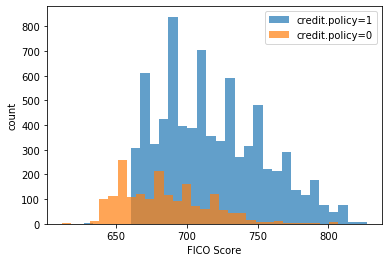

In [12]:
#FICO for those approved to be followers or not
_ = plt.hist(lc_data[lc_data['credit.policy']==1]['fico'], alpha = 0.7, bins = 30, label='credit.policy=1')
_ = plt.hist(lc_data[lc_data['credit.policy']==0]['fico'], alpha = 0.7, bins = 30, label='credit.policy=0')
_ = plt.xlabel('FICO Score')
_ = plt.ylabel('count')
_ = plt.legend()

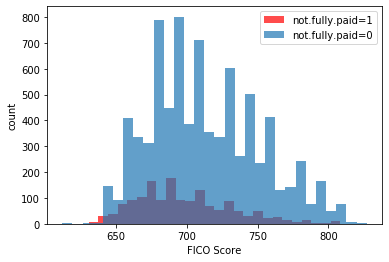

In [13]:
# FICO for those who paid or not
_ = plt.hist(lc_data[lc_data['not.fully.paid']==1]['fico'], alpha = 0.7, bins = 30, label='not.fully.paid=1',color='r')
_ = plt.hist(lc_data[lc_data['not.fully.paid']==0]['fico'], alpha = 0.7, bins = 30, label='not.fully.paid=0')
_ = plt.xlabel('FICO Score')
_ = plt.ylabel('count')
_ = plt.legend()

In [14]:
#Both of these graphs maintain a similar distribution, but not exactly the same

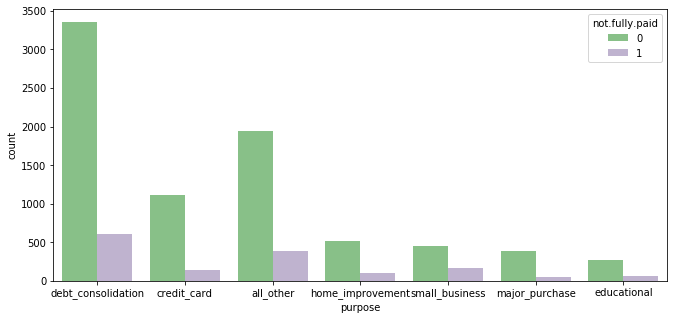

In [15]:
plt.figure(figsize=(11,5))
ax = sns.countplot(data=lc_data,x='purpose',hue='not.fully.paid',palette='Accent')

In [16]:
# Debt Consolidation is the number one reason to get a loan

In [17]:
x=pd.DataFrame(lc_data.groupby('not.fully.paid')['purpose'].value_counts())
x.rename(columns = {'purpose':'count'},inplace=True)
x=x.reset_index()
result = pd.crosstab(index=x['not.fully.paid'],columns=x['purpose'],values=x['count'],aggfunc='sum',normalize='columns')
result

purpose,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
not.fully.paid,,,,,,,
0,0.833977,0.884311,0.847612,0.798834,0.829889,0.887872,0.722132
1,0.166023,0.115689,0.152388,0.201166,0.170111,0.112128,0.277868


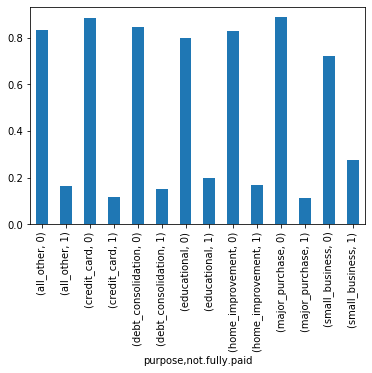

In [18]:
result.unstack().plot(kind='bar')

In [19]:
#Distribution of not fully paid loans is consistent across purposes

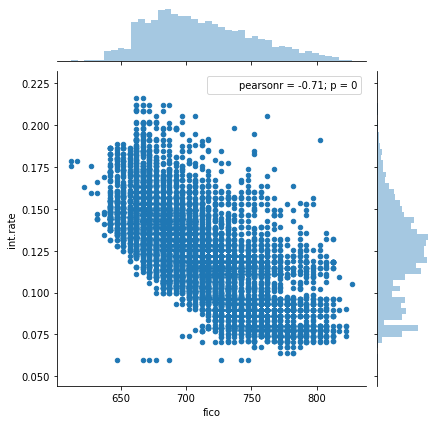

In [20]:
# We assume interest rates and FICO scores are correlated
g = sns.jointplot(data=lc_data,x='fico',y='int.rate', s = 20)
g = g.annotate(stats.pearsonr)

In [21]:
# Negative correlation, as expected

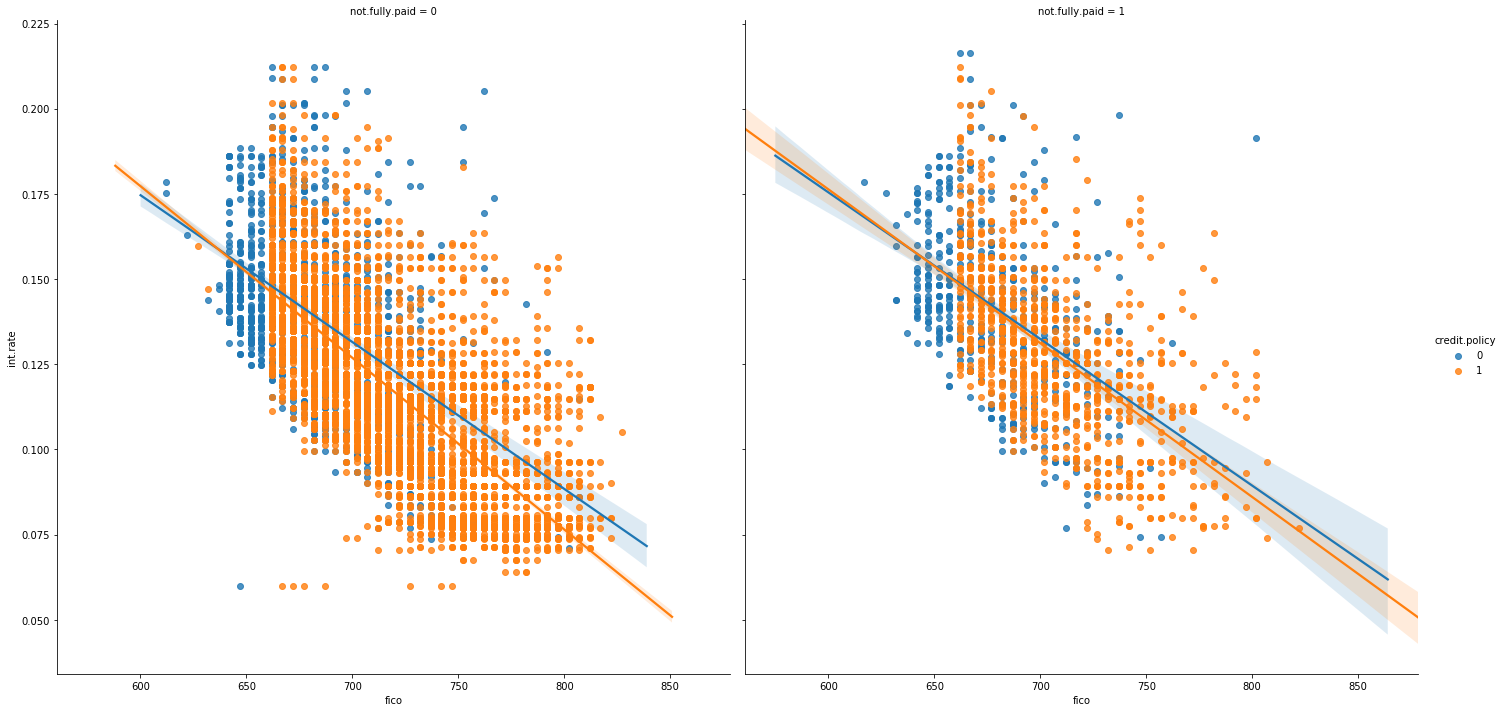

In [22]:
sns.lmplot(data=lc_data,x='fico',y='int.rate',col ='not.fully.paid',hue='credit.policy', height=10)

In [23]:
# From the regression line we can see that those who didn't meet their credit policy had a higher interest rate...
# than those who did. Clearly there is a strong correlation between having a higher FICO score and lower interest rates

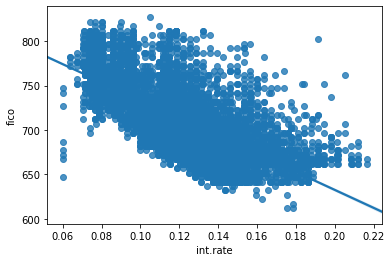

In [24]:
sns.regplot(y="fico", x="int.rate", data=lc_data, fit_reg = True)

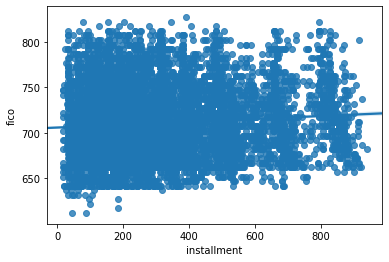

In [25]:
sns.regplot(y="fico", x="installment", data=lc_data, fit_reg = True)

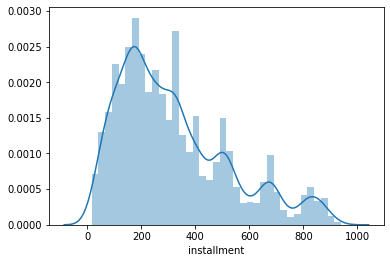

In [26]:
sns.distplot(lc_data['installment'])
plt.show()

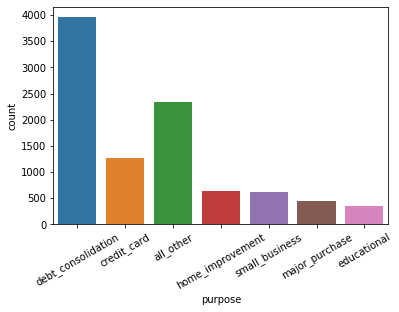

In [27]:
sns.countplot(x=lc_data['purpose'])
plt.xticks(rotation=30)
plt.show()

In [28]:
cat_feats = ['purpose']

In [29]:
lc_data1 = pd.get_dummies(lc_data,columns=cat_feats,drop_first=True)
lc_data1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [32]:
X1 = lc_data1.drop('not.fully.paid',axis=1)
y1 = lc_data1['not.fully.paid']

In [33]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=101)

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier()
dtree1.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
dtpredictions1 = dtree1.predict(X1_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(confusion_matrix(y1_test,dtpredictions1))
print(classification_report(y1_test,dtpredictions1))

[[2003  428]
 [ 344   99]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [38]:
rfc1 = RandomForestClassifier(n_estimators=200)

In [39]:
rfc1.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
rfc1_pred=rfc1.predict(X1_test)

In [41]:
print(confusion_matrix(y1_test,rfc1_pred))
print(classification_report(y1_test,rfc1_pred))

[[2423    8]
 [ 431   12]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.60      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [42]:
dtree2 = DecisionTreeClassifier(class_weight = "balanced")
dtree2.fit(X1_train,y1_train)
dtpredictions2 = dtree2.predict(X1_test)

In [43]:
print(confusion_matrix(y1_test,dtpredictions2))
print(classification_report(y1_test,dtpredictions2))

[[2056  375]
 [ 353   90]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2431
           1       0.19      0.20      0.20       443

    accuracy                           0.75      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.75      0.75      2874



In [44]:
rfc2 = RandomForestClassifier(n_estimators=200, class_weight = "balanced")
rfc2.fit(X1_train,y1_train)
rfc2_pred=rfc2.predict(X1_test)

In [45]:
print(confusion_matrix(y1_test,rfc2_pred))
print(classification_report(y1_test,rfc2_pred))

[[2428    3]
 [ 438    5]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.62      0.01      0.02       443

    accuracy                           0.85      2874
   macro avg       0.74      0.51      0.47      2874
weighted avg       0.81      0.85      0.78      2874

